# Name: Prasad Sanjay Khalkar

# Roll No: 33138

# TE-09 (L-09) 

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv("/home/prasadkhalkar/Desktop/ML/Datasets/temperatures.csv")
temp = df.copy()
temp

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03


In [4]:
temp.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,23.687436,25.597863,29.085983,31.975812,33.565299,32.774274,31.035897,30.507692,30.486752,29.766581,27.285470,24.608291,29.181368,24.629573,31.517607,31.198205,27.208120
std,33.919021,0.834588,1.150757,1.068451,0.889478,0.724905,0.633132,0.468818,0.476312,0.544295,0.705492,0.714518,0.782644,0.555555,0.911239,0.740585,0.420508,0.672003
min,1901.000000,22.000000,22.830000,26.680000,30.010000,31.930000,31.100000,29.760000,29.310000,29.070000,27.900000,25.700000,23.020000,28.110000,22.250000,29.920000,30.240000,25.740000
25%,1930.000000,23.100000,24.780000,28.370000,31.460000,33.110000,32.340000,30.740000,30.180000,30.120000,29.380000,26.790000,24.040000,28.760000,24.110000,31.040000,30.920000,26.700000
50%,1959.000000,23.680000,25.480000,29.040000,31.950000,33.510000,32.730000,31.000000,30.540000,30.520000,29.780000,27.300000,24.660000,29.090000,24.530000,31.470000,31.190000,27.210000
75%,1988.000000,24.180000,26.310000,29.610000,32.420000,34.030000,33.180000,31.330000,30.760000,30.810000,30.170000,27.720000,25.110000,29.470000,25.150000,31.890000,31.400000,27.610000
max,2017.000000,26.940000,29.720000,32.620000,35.380000,35.840000,34.480000,32.760000,31.840000,32.220000,32.290000,30.110000,28.010000,31.630000,28.330000,34.570000,32.410000,30.030000


In [5]:
temp.isnull().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

In [6]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     117 non-null    int64  
 1   JAN      117 non-null    float64
 2   FEB      117 non-null    float64
 3   MAR      117 non-null    float64
 4   APR      117 non-null    float64
 5   MAY      117 non-null    float64
 6   JUN      117 non-null    float64
 7   JUL      117 non-null    float64
 8   AUG      117 non-null    float64
 9   SEP      117 non-null    float64
 10  OCT      117 non-null    float64
 11  NOV      117 non-null    float64
 12  DEC      117 non-null    float64
 13  ANNUAL   117 non-null    float64
 14  JAN-FEB  117 non-null    float64
 15  MAR-MAY  117 non-null    float64
 16  JUN-SEP  117 non-null    float64
 17  OCT-DEC  117 non-null    float64
dtypes: float64(17), int64(1)
memory usage: 16.6 KB


In [16]:
temp.corr()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
YEAR,1.000000,0.575499,0.647066,0.553886,0.540662,0.407648,0.371840,0.478512,0.654138,0.664008,0.589073,0.697887,0.732222,0.801129,0.679869,0.640438,0.677061,0.749792
JAN,0.575499,1.000000,0.647017,0.457081,0.594674,0.365236,0.292855,0.339337,0.459944,0.499764,0.480695,0.526615,0.595902,0.749880,0.874226,0.575734,0.496515,0.607752
FEB,0.647066,0.647017,1.000000,0.589088,0.548803,0.377722,0.341302,0.418956,0.503188,0.472755,0.466916,0.519595,0.619320,0.792541,0.928731,0.635904,0.544527,0.609839
MAR,0.553886,0.457081,0.589088,1.000000,0.618621,0.387756,0.228349,0.232647,0.382344,0.370066,0.312226,0.498202,0.523316,0.689205,0.584612,0.848637,0.380640,0.505879
APR,0.540662,0.594674,0.548803,0.618621,1.000000,0.563317,0.299866,0.286052,0.490668,0.437970,0.473873,0.538037,0.579775,0.770596,0.643942,0.878402,0.474542,0.596943
MAY,0.407648,0.365236,0.377722,0.387756,0.563317,1.000000,0.274521,0.299072,0.473171,0.347289,0.468993,0.482822,0.444695,0.609015,0.403316,0.708221,0.431314,0.503445
JUN,0.371840,0.292855,0.341302,0.228349,0.299866,0.274521,1.000000,0.480925,0.504354,0.305761,0.380782,0.419968,0.366242,0.520189,0.351115,0.341301,0.749132,0.409325
JUL,0.478512,0.339337,0.418956,0.232647,0.286052,0.299072,0.480925,1.000000,0.622985,0.531865,0.568341,0.535413,0.440813,0.588454,0.423876,0.321388,0.799602,0.541023
AUG,0.654138,0.459944,0.503188,0.382344,0.490668,0.473171,0.504354,0.622985,1.000000,0.680212,0.661177,0.588961,0.595330,0.755384,0.534818,0.560118,0.866202,0.665040
SEP,0.664008,0.499764,0.472755,0.370066,0.437970,0.347289,0.305761,0.531865,0.680212,1.000000,0.680744,0.683866,0.629223,0.730756,0.529533,0.485397,0.778875,0.734650


In [8]:
temp.shape

(117, 18)

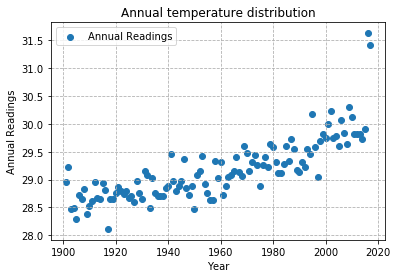

In [9]:
x = temp["YEAR"]
y = temp["ANNUAL"]

plt.scatter(x,y)
plt.xlabel("Year")
plt.ylabel("Annual Readings")
plt.title("Annual temperature distribution")
plt.grid(ls='--')
plt.legend(['Annual Readings'],loc=2)
plt.show()

# Linear Regression for December

## Splitting data into train and test

In [30]:
x = temp[['YEAR']]
y = temp[['DEC']]

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=1)

## Training the model

In [35]:
lm = LinearRegression()

In [36]:
model = lm.fit(x_train,y_train)

In [38]:
b1 = model.coef_
b0 = model.intercept_

In [39]:
print(b1)
print(b0)

[[0.01706226]]
[-8.77738666]


## Predicting

In [41]:
pred = model.predict(x_test)

In [44]:
d = pd.DataFrame(x_test)

In [45]:
d['Actual_temp'] = y_test
d['Predicted_temp'] = pred

In [46]:
d

,YEAR,Actual_temp,Predicted_temp
69,1970,25.07,24.835263
46,1947,24.31,24.442831
58,1959,25.00,24.647578
114,2015,25.67,25.603065
73,1974,23.63,24.903512
98,1999,25.72,25.330069
31,1932,24.52,24.186897
53,1954,24.42,24.562267
65,1966,24.70,24.767014
96,1997,23.92,25.295944


## Finding Errors

In [57]:
MAE = mean_absolute_error(y_test,pred)
MSE = mean_squared_error(y_test,pred)
RSE = r2_score(y_test,pred)

In [56]:
print('Mean Absolute Error = %.3f'%MAE)
print('Mean Squared Error = %.3f'%MSE)
print('RSE = %.3f'%RSE)

Mean Absolute Error = 0.373
Mean Squared Error = 0.248
RSE = 0.484


## Plotting Line 

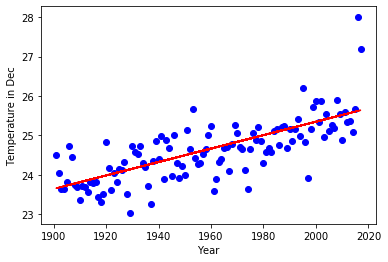

In [58]:
plt.scatter(temp['YEAR'],temp['DEC'],c='blue')
plt.xlabel('Year')
plt.ylabel('Temperature in Dec')
plt.plot(x_train,b0+b1*x_train,c='red')
plt.show()

# Linear Regression for September

## Splitting data into train and test

In [60]:
y1 = temp[['SEP']]

In [61]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x,y1,test_size=0.25,random_state=1)

## Training the model

In [62]:
model1 = lm.fit(x1_train,y1_train)

In [63]:
slope1 = model1.coef_
inter1 = model1.intercept_

In [64]:
print(slope1,inter1)

[[0.0102336]] [10.42872908]


## Predicting

In [65]:
pred1 = model1.predict(x1_test)
d1 = pd.DataFrame(x1_test)

In [66]:
d1['Actual_temp'] = y1_test
d1['Predicted_temp'] = pred1

In [67]:
d1

,YEAR,Actual_temp,Predicted_temp
69,1970,30.41,30.588919
46,1947,29.70,30.353546
58,1959,30.39,30.476350
114,2015,31.55,31.049431
73,1974,30.87,30.629854
98,1999,31.22,30.885694
31,1932,30.83,30.200042
53,1954,29.87,30.425182
65,1966,30.25,30.547985
96,1997,31.11,30.865226


## Finding Errors

In [68]:
MAE1 = mean_absolute_error(y1_test,pred1)
MSE1 = mean_squared_error(y1_test,pred1)
RSE1 = r2_score(y1_test,pred1)

In [69]:
print('Mean Absolute Error = %.3f'%MAE1)
print('Mean Squared Error = %.3f'%MSE1)
print('RSE = %.3f'%RSE1)

Mean Absolute Error = 0.273
Mean Squared Error = 0.132
RSE = 0.454


## Plotting Line

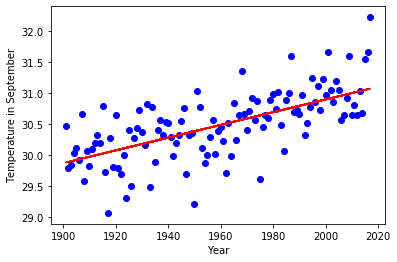

In [76]:
plt.scatter(temp['YEAR'],temp['SEP'],c='blue')
plt.xlabel('Year')
plt.ylabel('Temperature in September')
plt.plot(x1_train,inter1+slope1*x1_train,c='red')
plt.show()

# Linear Regression for Annual temp

## Splitting the data into train and test

In [73]:
y2 = temp[['ANNUAL']]

In [74]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x,y2,test_size=0.25,random_state=1)

## Training the model 

In [77]:
model2 = lm.fit(x2_train,y2_train)

In [78]:
slope2 = model2.coef_
inter2 = model2.intercept_

In [79]:
print(slope2,inter2)

[[0.0134026]] [2.9609047]


## Predicting

In [81]:
pred2 = model2.predict(x2_test)
d2 = pd.DataFrame(x2_test)

In [82]:
d2['Actual_temp'] = y2_test
d2['Predicted_temp'] = pred2

In [83]:
d2

,YEAR,Actual_temp,Predicted_temp
69,1970,29.47,29.364036
46,1947,28.84,29.055776
58,1959,29.02,29.216607
114,2015,29.90,29.967153
73,1974,29.26,29.417646
98,1999,29.81,29.752711
31,1932,29.09,28.854737
53,1954,28.92,29.149594
65,1966,29.41,29.310425
96,1997,29.05,29.725906


## Finding Errors

In [84]:
MAE2 = mean_absolute_error(y2_test,pred2)
MSE2 = mean_squared_error(y2_test,pred2)
RSE2 = r2_score(y2_test,pred2)

In [85]:
print('Mean Absolute Error = %.3f'%MAE2)
print('Mean Squared Error = %.3f'%MSE2)
print('RSE = %.3f'%RSE2)

Mean Absolute Error = 0.217
Mean Squared Error = 0.078
RSE = 0.617


## Plotting Line

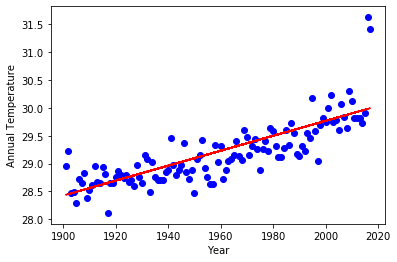

In [98]:
plt.scatter(temp['YEAR'],temp['ANNUAL'],c='blue')
plt.xlabel('Year')
plt.ylabel('Annual Temperature')
plt.plot(x2_train,inter2+slope2*x2_train,c='red')
plt.show()

# Regression for Jan

## Splitting the data into train and test

In [88]:
y3 = temp[['JAN']]

In [89]:
x3_train,x3_test,y3_train,y3_test = train_test_split(x,y3,test_size=0.25,random_state=1)

## Training the model

In [90]:
model3 = lm.fit(x3_train,y3_train)

In [91]:
slope3 = model3.coef_
inter3 = model3.intercept_

In [92]:
print(slope3,inter3)

[[0.01468067]] [-5.00631942]


## Predicting

In [93]:
pred3 = model3.predict(x3_test)
d3 = pd.DataFrame(x3_test)

In [94]:
d3['Actual_temp'] = y3_test
d3['Predicted_temp'] = pred3

In [95]:
d3

,YEAR,Actual_temp,Predicted_temp
69,1970,24.19,23.914602
46,1947,22.61,23.576947
58,1959,23.33,23.753115
114,2015,24.58,24.575233
73,1974,23.54,23.973325
98,1999,23.57,24.340342
31,1932,24.13,23.356737
53,1954,22.79,23.679712
65,1966,24.11,23.855880
96,1997,23.30,24.310981


## Finding errors

In [96]:
MAE3 = mean_absolute_error(y3_test,pred3)
MSE3 = mean_squared_error(y3_test,pred3)
RSE3 = r2_score(y3_test,pred3)

In [97]:
print('Mean Absolute Error = %.3f'%MAE3)
print('Mean Squared Error = %.3f'%MSE3)
print('RSE = %.3f'%RSE3)

Mean Absolute Error = 0.540
Mean Squared Error = 0.400
RSE = 0.220


## Plotting the line

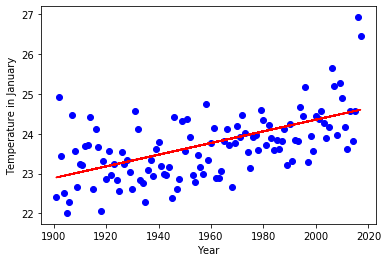

In [99]:
plt.scatter(temp['YEAR'],temp['JAN'],c='blue')
plt.xlabel('Year')
plt.ylabel('Temperature in January')
plt.plot(x3_train,inter3+slope3*x3_train,c='red')
plt.show()